In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from craco import craco_candidate

cand_query_dict = {
    'sbid': '50705', 'beam': '31', 'dm': '50.372', 'lpix': '200', 'mpix': '74', 
    'ra': '268.247', 'dec': '-28.112', 'totalsample': '2991', 'scan': '00', 
    'tstart': None, 'results': 'results', 'boxcwidth': "0", 'npzfname': 
    'SB50705_B31_results_102_150_t2991.npz', 
    'uvfitspath': '/data/seren-02/big/craco/SB050705/scans/00/20230622173926/results/b31.uvfits', 
    'calpath': '/data/seren-01/big/craco/SB050705/cal/31/b31.aver.4pol.smooth.npy'
}

crow = {
    "ra_deg": float(cand_query_dict["ra"]), "dec_deg": float(cand_query_dict["dec"]),
    "dm_pccm3": float(cand_query_dict["dm"]), "total_sample": int(cand_query_dict["totalsample"]),
    "boxc_width": int(cand_query_dict["boxcwidth"]), 
    "lpix": int(cand_query_dict["lpix"]), "mpix": int(cand_query_dict["mpix"]),
}

cand = craco_candidate.Candidate(
    crow = crow,
    uvsource = cand_query_dict["uvfitspath"],
    calibration_file = cand_query_dict["calpath"],
    workdir="./test", padding=100
)

cand.search_output["obstime_sec"] = cand.search_output["total_sample"] * cand.tsamp

parsing values --ndm 2 --npix 256


/data/seren-01/fast/wan342/scripts/craft/src/craft/uvfits.py:269: UserWarning: Dont yet support multiple source files: 2 - using source at 2 which is (2, 'VAST_1806-25', 0, '', 0.0, 0.0, 0.0, 0.0, 0.0, 119.99999999999982, 268.7314452442622, -27.72666596868787, 2000.0, 268.7314452442622, -27.72666596868787, 0.0, 0.0, 0.0, 0.0)
  warnings.warn(f'Dont yet support multiple source files: {len(source_table)} - using source at {first_targetidx} which is {row}')
/data/seren-01/fast/wan342/scripts/craft/src/craft/craco_plan.py:145: UserWarning: Cannot grid things on U=0 or V=0 blid=259.0 1-3 uvpix=(2, 0)
  warnings.warn(f'Cannot grid things on U=0 or V=0 blid={blid} {a1}-{a2} uvpix={uvpix}')
/data/seren-01/fast/wan342/scripts/craft/src/craft/craco_plan.py:145: UserWarning: Cannot grid things on U=0 or V=0 blid=259.0 1-3 uvpix=(3, 0)
  warnings.warn(f'Cannot grid things on U=0 or V=0 blid={blid} {a1}-{a2} uvpix={uvpix}')
/data/seren-01/fast/wan342/scripts/craft/src/craft/craco_plan.py:145: UserW

Upper registers [(4, 1), (5, 1), (10, 1), (11, 1), (24, 1), (25, 1), (26, 1), (27, 1), (179, 1), (180, 1), (181, 1), (182, 1), (183, 1), (184, 1), (185, 1), (202, 1), (203, 1), (204, 1), (205, 1), (206, 1), (207, 1), (221, 1), (222, 1), (223, 1), (224, 1), (225, 1), (226, 1), (2, 2), (11, 2), (12, 2), (29, 2), (30, 2)]
Lower registers [(2, 3), (2, 5), (7, 8), (8, 9), (1, 13), (2, 13), (12, 13), (2, 14), (12, 14), (13, 14), (13, 15), (14, 16), (14, 17), (15, 17), (13, 18), (15, 18), (16, 18), (13, 19), (14, 19), (16, 19), (17, 19), (4, 20), (9, 20), (14, 20), (17, 20), (18, 20), (4, 21), (9, 21), (18, 21), (19, 21), (3, 22), (4, 22)]


In [2]:
cand._calibrate_data(cand.calibration_file)
cand._rotate_vis()
cand._normalise_vis()
cand._load_burst_filterbank()
cand._normalise_vis(target=False)
cand._dedisperse_block(dm=cand.search_output["dm_pccm3"])

In [4]:
from craft.craco_kernels import Gridder, Imager 

imager = Imager(cand.uvsource, cand.plan, "")

### Image with old gridder

In [5]:
def _image_gridded_data(data, imager):
    assert len(data.shape) == 2, "only 2D uv data is allowed..."
    return imager(np.fft.fftshift(data)).astype(np.complex64)

In [14]:
old_gridder = Gridder(cand.uvsource, cand.plan, "")
old_grid_data = old_gridder(cand.dedisp_data)
_imgcube = np.array([
    _image_gridded_data(old_grid_data[..., i], imager)
    for i in range(old_grid_data.shape[-1])
])

old_imgcube = []
for i in _imgcube:
    old_imgcube.append([i.real])
    old_imgcube.append([i.imag])
old_imgcube = np.concatenate(old_imgcube)

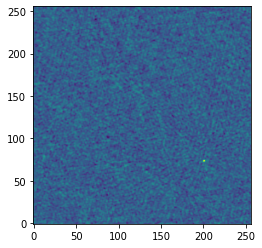

In [16]:
plt.imshow(old_imgcube[101], origin="lower")

### Image with new gridder

In [21]:
new_gridder = Gridder(cand.uvsource, cand.plan, "")
new_grid_data = new_gridder.grid_with_uvws(cand.dedisp_data, cand._burst_uvws)
_imgcube = np.array([
    _image_gridded_data(new_grid_data[..., i], imager)
    for i in range(new_grid_data.shape[-1])
])

new_imgcube = []
for i in _imgcube:
    new_imgcube.append([i.real])
    new_imgcube.append([i.imag])
new_imgcube = np.concatenate(new_imgcube)

/data/seren-01/fast/wan342/scripts/craft/src/craft/craco_plan.py:145: UserWarning: Cannot grid things on U=0 or V=0 blid=258.0 1-2 uvpix=(0, 0)
  warnings.warn(f'Cannot grid things on U=0 or V=0 blid={blid} {a1}-{a2} uvpix={uvpix}')
/data/seren-01/fast/wan342/scripts/craft/src/craft/craco_plan.py:145: UserWarning: Cannot grid things on U=0 or V=0 blid=259.0 1-3 uvpix=(0, 0)
  warnings.warn(f'Cannot grid things on U=0 or V=0 blid={blid} {a1}-{a2} uvpix={uvpix}')
/data/seren-01/fast/wan342/scripts/craft/src/craft/craco_plan.py:145: UserWarning: Cannot grid things on U=0 or V=0 blid=260.0 1-4 uvpix=(0, 0)
  warnings.warn(f'Cannot grid things on U=0 or V=0 blid={blid} {a1}-{a2} uvpix={uvpix}')
/data/seren-01/fast/wan342/scripts/craft/src/craft/craco_plan.py:145: UserWarning: Cannot grid things on U=0 or V=0 blid=261.0 1-5 uvpix=(0, 0)
  warnings.warn(f'Cannot grid things on U=0 or V=0 blid={blid} {a1}-{a2} uvpix={uvpix}')
/data/seren-01/fast/wan342/scripts/craft/src/craft/craco_plan.py:145

/data/seren-01/fast/wan342/scripts/craft/src/craft/craco_plan.py:145: UserWarning: Cannot grid things on U=0 or V=0 blid=2326.0 9-22 uvpix=(80, 0)
  warnings.warn(f'Cannot grid things on U=0 or V=0 blid={blid} {a1}-{a2} uvpix={uvpix}')
/data/seren-01/fast/wan342/scripts/craft/src/craft/craco_plan.py:145: UserWarning: Cannot grid things on U=0 or V=0 blid=2326.0 9-22 uvpix=(81, 0)
  warnings.warn(f'Cannot grid things on U=0 or V=0 blid={blid} {a1}-{a2} uvpix={uvpix}')


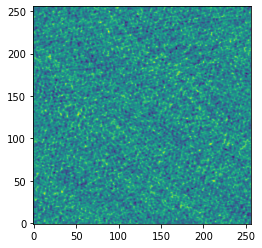

In [22]:
plt.imshow(new_imgcube[101], origin="lower")